In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [35]:
#drop column no
df = df.drop('No', axis=1)

In [36]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The house prices spread from a range of 7.6 Pyng to 117.5 Pyng with an average of 37.98 Pyng. Furthermore, the middle value or median of the house prices which is 38.45 Pyng almost shows the similarity with the average of 37.98 Pyng (Meaning the Normal Distribution Assumption is valid).

**Simplify the colums label for a better processing**

In [37]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [38]:
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [39]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


**EDA**

Check outliers in the dataset

<Axes: >

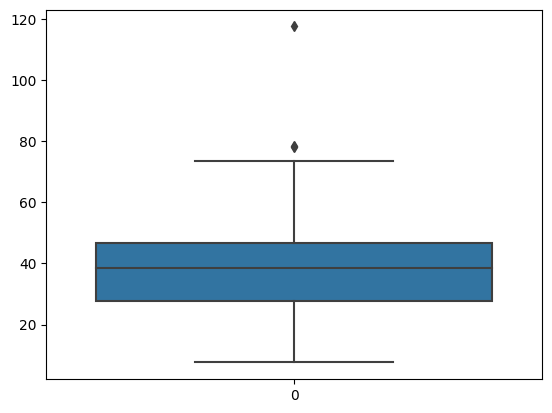

In [40]:
sns.boxplot(data=df['Y'])

From the above boxplot, there are outlier data around the values of 75-80 and below 120.

To find correlation between the variables

In [41]:
# Correlations in the data
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'X1'),
  Text(0, 1.5, 'X2'),
  Text(0, 2.5, 'X3'),
  Text(0, 3.5, 'X4'),
  Text(0, 4.5, 'X5'),
  Text(0, 5.5, 'X6'),
  Text(0, 6.5, 'Y')])

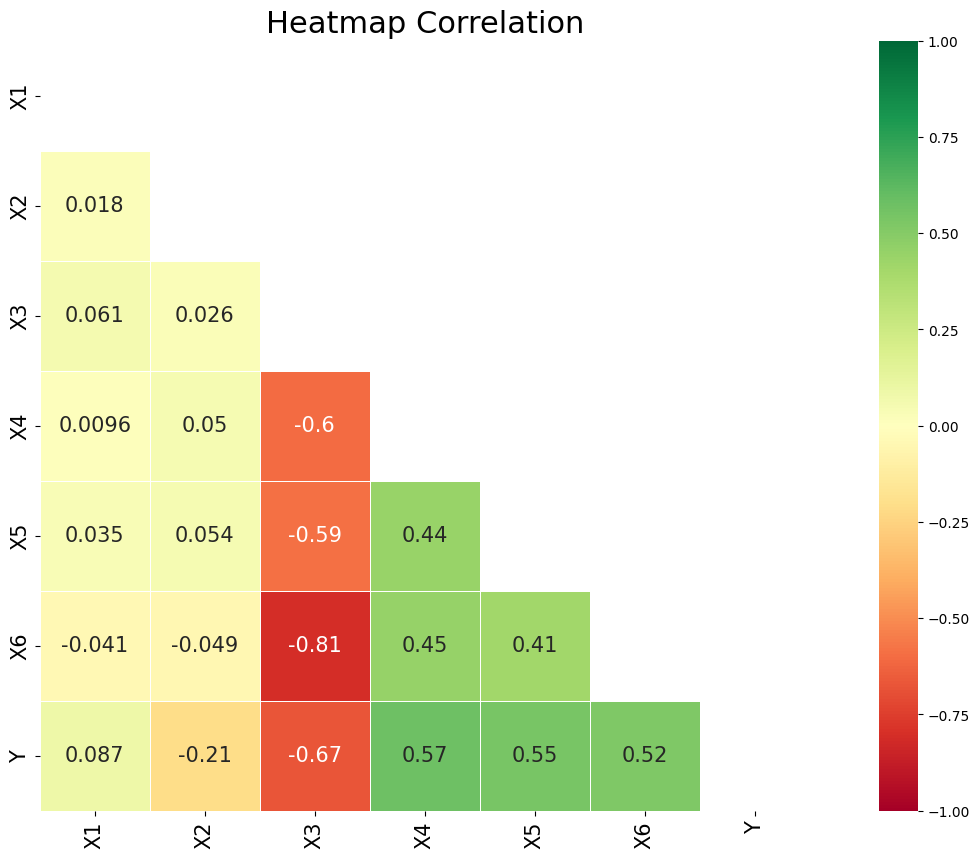

In [42]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway:

1) From the correlation test, it can be determined that there is a relationship between variables X3, X4, X5, and X6 with variable Y.

2) X3 and Y have a negative correlation coefficient (-0.67), which means the distance to the nearest MRT station is negatively related to the size of the housing unit price. The closer the housing area is to the MRT station, the higher the price of the house, and vice versa.


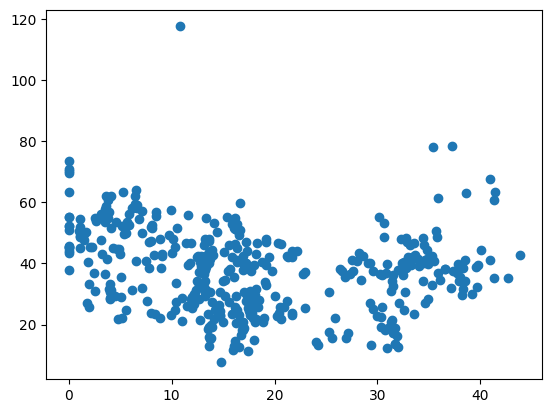

In [43]:
#House Age vs House Price Plot
plt.scatter(df['X2'],df['Y'])

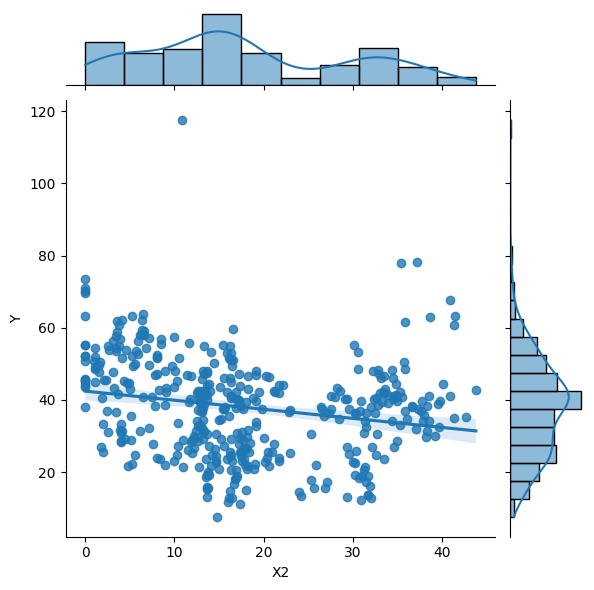

In [44]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df, kind="reg")

House Age (X2) doesn't show a correlation with house price (Y) because of its small corr value.

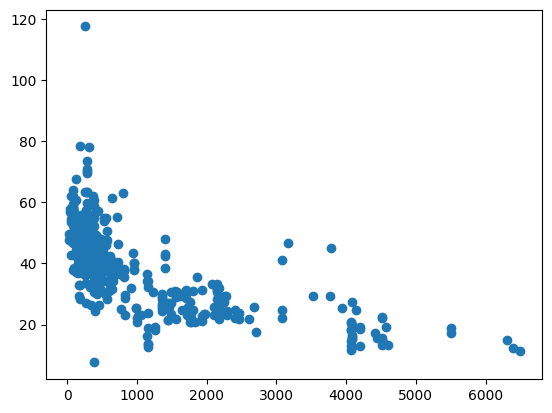

In [45]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df['X3'],df['Y'])

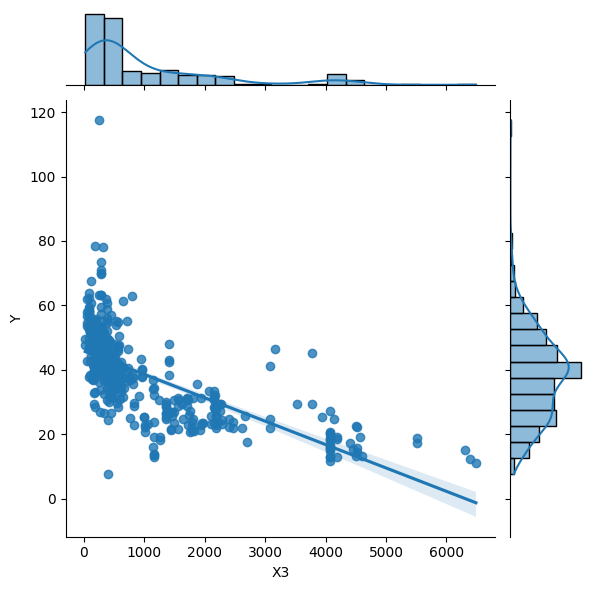

In [46]:
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

There is a negative relationship between the distance to the MRT (X3) around the housing area and the house price per unit (Y). In other words, the closer the distance to the MRT, the higher the house price or the further the distance to the MRT, the lower the house price.


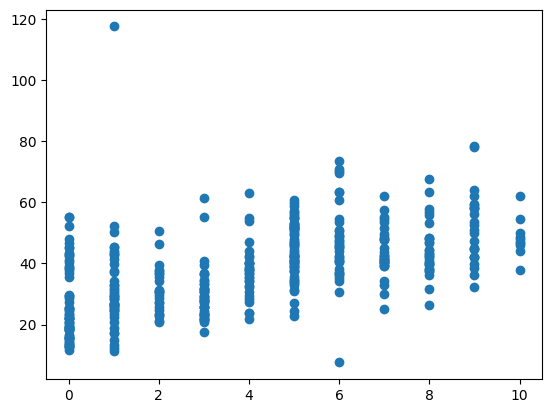

In [47]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

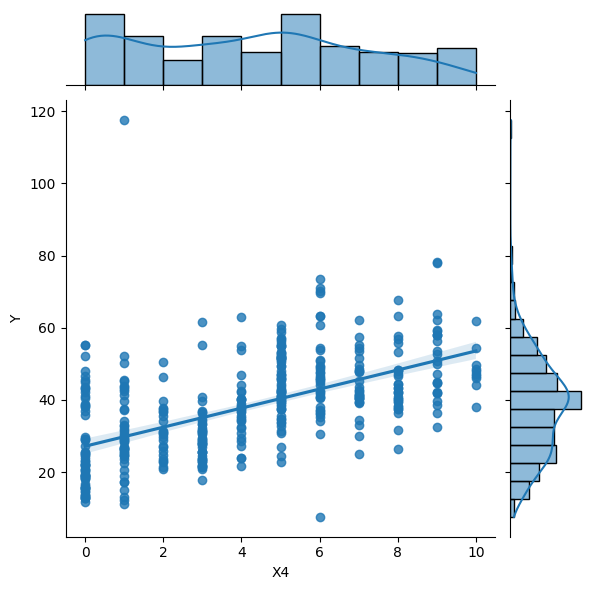

In [48]:
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

There is a positive relationship between the number of shopping centers (X4) around the housing area and the house price (Y). It can be said that the more shopping centers there are, the higher the house price will be, and vice versa.

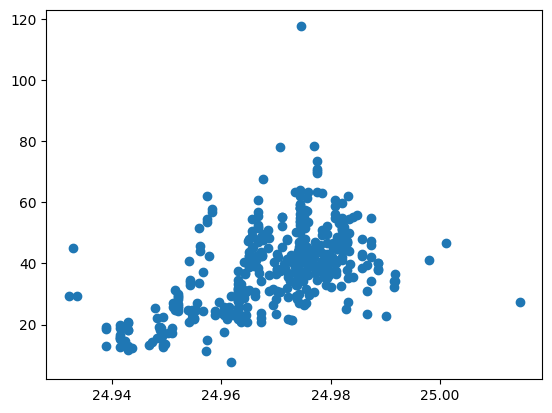

In [49]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

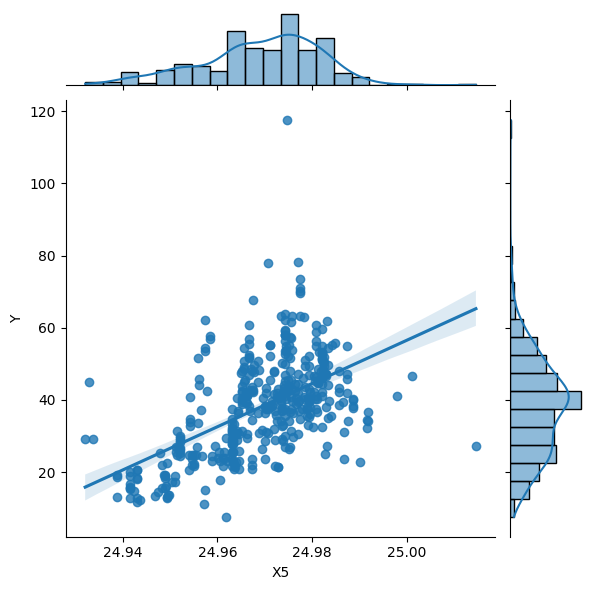

In [50]:
sns.jointplot(x='X5', y='Y', data=df, kind="reg")

There is a positive relationship between latitude (geographic location) and house price.

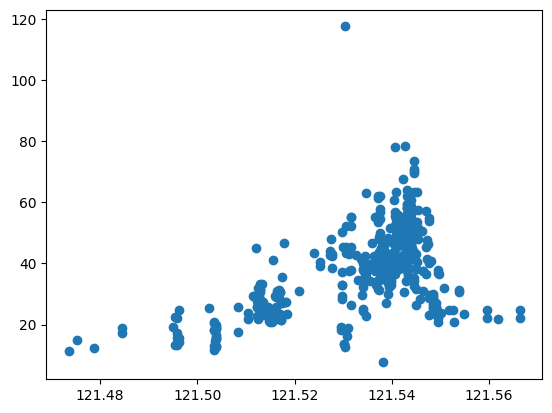

In [51]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

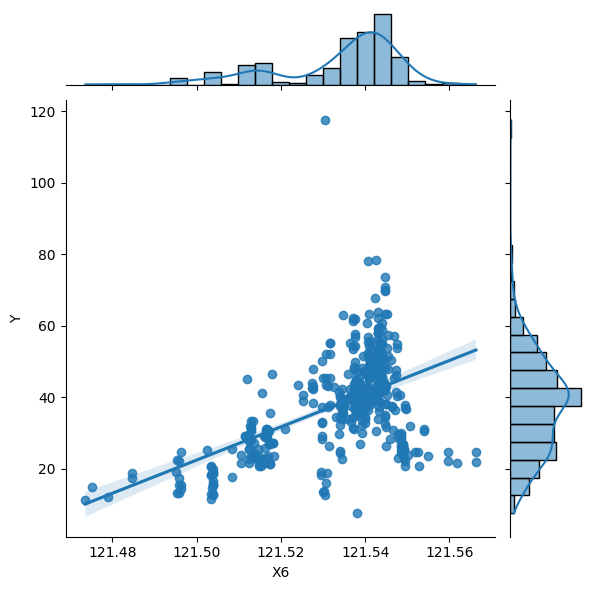

In [52]:
sns.jointplot(x='X6', y='Y', data=df, kind="reg")

There is a positive or aligned relationship between longitude (map location) and house price.

**Conclusion:**

There are variables that have a correlation with the House Price (Y), they are:

1) X3 (distance to MRT)

2) X4 (number of shopping centers)

3) X5 (latitude)

4) X6 (longitude)

Where X3 (distance to MRT) is the only variable with a negative correlation.

**Feature Engineering:**

**Checking Multicolinearity**

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

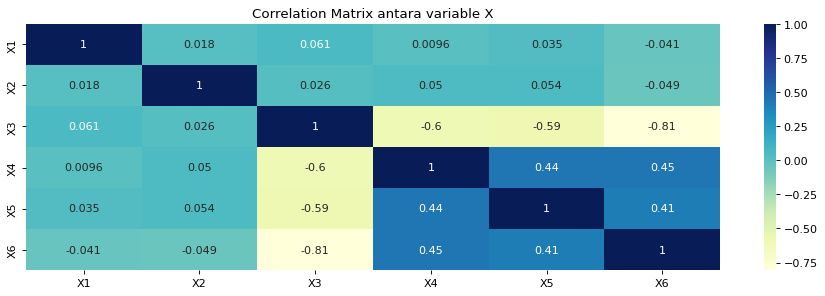

In [53]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Between all the independent variables, multicollinearity appears between variables X3 and X6 with a value of -0.62. This means that the distance to the MRT and longitude have a high correlation.

**Data Preprocessing**

In [54]:
df.isna().sum().sort_values(ascending=False)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

**Data conversion**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


There is false data type, X1 should be datetime.

In [56]:
df["X1"] = pd.to_datetime(df["X1"])

In [57]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

In [58]:
# Check duplicate values
df[df.duplicated(keep=False)]

,X1,X2,X3,X4,X5,X6,Y


There is no row that shows False value or duplicate values.

**Model Prediction**

In [59]:
X = df.loc[:, 'X3':'X5']
y = pd.DataFrame(df['Y'])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Feature Scaling**

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
ypred= model.predict(X_test)

In [68]:
ypred = ypred.reshape(-1,1)

In [69]:
# evaluate model
display(model.score(X_test, y_test))

0.5890556871399897

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [74]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  54.4
MAE :  5.83
RMSE :  7.38


In [75]:
#R2 SQUARE
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.59

This regression model is only able to explain 55% of its data variability, with the remaining 45% being explained by other variables in predicting housing prices. The regression model is considered good if R2 is greater than 75%.

**Random Forest Regression**

In [76]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6785461394530087

MSE :  42.55287787462107
MAE :  5.102287625984398
RMSE :  6.523256692375448


**Support Vector Regression (SVR)**

In [77]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

SVR()

In [78]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6283869283558275

MSE :  49.1927694611577
MAE :  5.119280204793331
RMSE :  7.013755731500614


**Decission Tree Regressor**

In [79]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(random_state=1)
model4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [80]:
# evaluate model
display(model4.score(X_test, y_test))

# use model to predict
ypred = model4.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.4864830901972461

MSE :  67.97747680555554
MAE :  5.8627
RMSE :  8.244845468870569


**Model Comparison**

In [81]:
print('Model RF : ', model2.score(X_test, y_test))
print('Model SVR : ', model3.score(X_test, y_test))
print('Regresi Linear : ', model.score(X_test, y_test))
print('Model DTR : ', (model4.score(X_test, y_test)))

Model RF :  0.6785461394530087
Model SVR :  0.6283869283558275
Regresi Linear :  0.5890556871399897
Model DTR :  0.4864830901972461


**Conclusion**

The best accuracy model from the four models is the Random Forest Regression Model because it has a higher model accuracy compared to the other models. In addition, the SVR model has the lowest error rate among the other models. Therefore, the SVR model is able to predict the price of a house well.